In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client.PGAStats

wells_fargo= db.wellsFargo
wf_data = pd.DataFrame(list(wells_fargo.find()))
expanded= db.expanded
expanded_data = pd.DataFrame(list(expanded.find()))

In [51]:
wf_data = wf_data[['year','name','total']]

In [52]:
wf_data2 = wf_data[(wf_data['total'])!='--'].copy()

In [53]:
expanded_data[(expanded_data['name'])=='Jason Day']

,_id,age,driveAcc,driveTotal,gir,name,puttAvg,rank,savePCT,yardPerDrive,year
3,5cbf470a8cc3ae1883dbaf56,31,54.7,190,64.9,Jason Day,1.737,4,61.0,302.6,2011
217,5cbf47328cc3ae1883dbb02c,31,52.5,127,61.3,Jason Day,1.756,32,54.4,308.6,2012
387,5cbf475a8cc3ae1883dbb0d6,31,58.0,156,64.9,Jason Day,1.759,11,61.4,299.3,2013
576,5cbf47828cc3ae1883dbb193,31,58.7,73,64.0,Jason Day,1.776,20,57.3,301.2,2014
743,5cbf47ab8cc3ae1883dbb23a,31,55.9,159,67.1,Jason Day,1.712,10,61.1,313.7,2015
970,5cbf48048cc3ae1883dbb31d,31,53.9,112,63.7,Jason Day,1.716,48,53.9,306.2,2017
1122,5cbf48258cc3ae1883dbb3b5,31,58.1,0,66.0,Jason Day,1.712,31,60.9,309.7,2018
1397,5cbf485e8cc3ae1883dbb4c8,31,63.9,115,70.9,Jason Day,1.702,31,51.1,298.4,2019


In [54]:
data1 = pd.merge(wf_data2,expanded_data, on=['name','year'], how='inner')

In [57]:
data1

,year,name,total,age,driveAcc,gir,puttAvg,rank,savePCT,yardPerDrive
0,2018,Jason Day,272,31,58.1,66.0,1.712,31,60.9,309.7
1,2018,Aaron Wise,274,22,63.4,69.4,1.746,109,48.9,302.9
2,2018,Nick Watney,274,37,56.3,68.0,1.755,167,43.8,307.5
3,2018,Bryson DeChambeau,276,25,61.9,70.1,1.754,98,49.6,305.5
4,2018,Phil Mickelson,277,48,51.6,65.0,1.693,14,59.5,300.7
5,2018,Paul Casey,277,41,62.8,68.2,1.769,50,53.3,304.3
6,2018,Peter Uihlein,277,29,52.4,68.2,1.780,25,56.6,302.0
7,2018,Patrick Reed,278,28,54.4,63.5,1.744,19,57.5,298.3
8,2018,Emiliano Grillo,279,26,69.9,69.2,1.752,28,56.0,294.8
9,2018,Luke List,279,34,54.7,68.8,1.791,53,53.1,314.7


In [56]:
data1 = data1.drop(['driveTotal','_id'], axis=1)

In [58]:
data1 = data1[['total','driveAcc','gir','puttAvg','savePCT','yardPerDrive']].astype(float)

In [59]:
data1.describe(include='all')

,total,driveAcc,gir,puttAvg,savePCT,yardPerDrive
count,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,221.683706,61.156230,64.869862,1.778619,49.259957,291.072417
std,67.489785,4.887025,3.102210,0.024446,6.020131,8.783460
min,72.000000,45.400000,53.500000,1.693000,29.500000,268.900000
25%,148.000000,57.700000,63.100000,1.762000,45.050000,285.100000
50%,276.000000,61.100000,65.200000,1.778000,49.500000,290.900000
75%,285.000000,64.500000,66.900000,1.794000,53.300000,296.450000
max,304.000000,75.700000,73.200000,1.862000,65.400000,319.800000


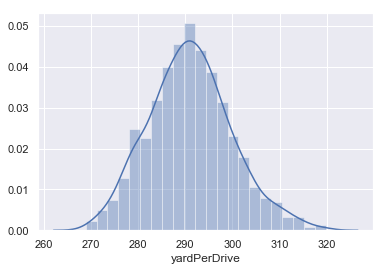

In [65]:
sns.distplot(data1['yardPerDrive'])

In [66]:
data_cleaned = data1
data_cleaned.columns.values

array(['total', 'driveAcc', 'gir', 'puttAvg', 'savePCT', 'yardPerDrive'],
      dtype=object)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['total', 'driveAcc', 'gir', 'puttAvg', 'savePCT', 'yardPerDrive']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [69]:
vif

,VIF,Features
0,12.553660,total
1,269.453820,driveAcc
2,684.238566,gir
3,1725.798326,puttAvg
4,63.650579,savePCT
5,1608.100854,yardPerDrive


In [72]:
targets = data_cleaned['total']
inputs = data_cleaned.drop(['total'],axis=1)

In [73]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
inputs_scaled = scaler.transform(inputs)

In [76]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [77]:
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
y_hat = reg.predict(x_train)

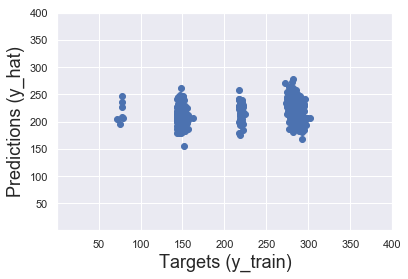

In [82]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(1,400)
plt.ylim(1,400)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

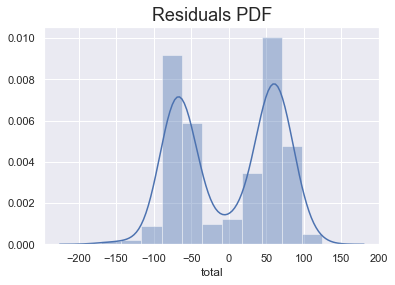

In [83]:
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

In [84]:
reg.score(x_train,y_train)

0.06004378291433321

In [85]:
reg.intercept_

219.66716836232223

In [86]:
reg.coef_

array([  3.71678818,   7.98497719, -10.13967863,   4.65794512,
         6.47275904])

In [87]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,driveAcc,3.716788
1,gir,7.984977
2,puttAvg,-10.139679
3,savePCT,4.657945
4,yardPerDrive,6.472759


In [88]:
y_hat_test = reg.predict(x_test)

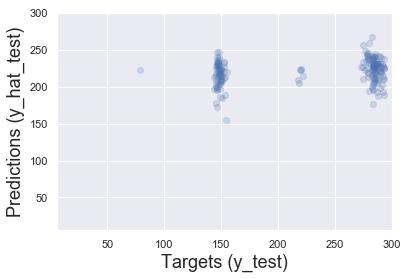

In [90]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,300)
plt.ylim(6,300)
plt.show()

In [100]:
df_pf = pd.DataFrame((y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,224.72
1,232.52
2,193.90
3,221.79
4,241.46


In [101]:
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,224.72,147.00
1,232.52,148.00
2,193.90,280.00
3,221.79,282.00
4,241.46,278.00
5,202.25,283.00
6,205.05,218.00
7,226.46,287.00
8,210.32,288.00
9,223.92,293.00


In [102]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0   147.00
1   148.00
2   280.00
3   282.00
4   278.00
Name: total, dtype: float64

In [105]:
df_pf['Target'] = y_test
df_pf

,Prediction,Target,Residual,Difference%
0,224.72,147.00,69388714177584037190290736898143015592774899681...,100.00
1,232.52,148.00,18861808084906519176442302226661206405859598013...,100.00
2,193.90,280.00,40036392008717846958081649719479725454323056781...,100.00
3,221.79,282.00,29583114655119492934996567668802305737231452121...,100.00
4,241.46,278.00,54183364522718864521715633930591870475320850336...,100.00
5,202.25,283.00,80415242996231792871451508538837575650995052439...,100.00
6,205.05,218.00,47445721460229658823571144923127459653286734449...,100.00
7,226.46,287.00,43905235020600152190905118225569276357769051782...,100.00
8,210.32,288.00,11934680253072108769358698375640827183152732582...,100.00
9,223.92,293.00,17712635992375699284462346954241471177258995199...,100.00


In [106]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,224.72,147.00,-77.72,52.87
1,232.52,148.00,-84.52,57.11
2,193.90,280.00,86.10,30.75
3,221.79,282.00,60.21,21.35
4,241.46,278.00,36.54,13.14
5,202.25,283.00,80.75,28.53
6,205.05,218.00,12.95,5.94
7,226.46,287.00,60.54,21.10
8,210.32,288.00,77.68,26.97
9,223.92,293.00,69.08,23.58


In [107]:
df_pf['Prediction']=df_pf['Prediction'].round(2)

In [108]:
pd.options.display.float_format = '{:.2f}'.format

In [110]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,188.00,188.00,188.00,188.00
mean,220.56,230.63,10.07,30.45
std,16.57,66.46,64.53,18.83
min,154.68,79.00,-142.71,0.44
25%,210.70,149.00,-59.86,19.28
50%,222.98,279.00,43.60,24.49
75%,230.97,285.00,60.89,40.65
max,266.97,304.00,107.20,180.64
